  **Overview of Hybrid Quantum-Classical Model for Defect Classification in TIG Welding**

---



This study focuses on developing an automated system for classifying defects in Tungsten Inert Gas (TIG) welding processes using a Hybrid Quantum-Classical Model. The model leverages both high dynamic range (HDR) imaging and advanced neural network techniques to identify welding imperfections in Aluminium 5083.


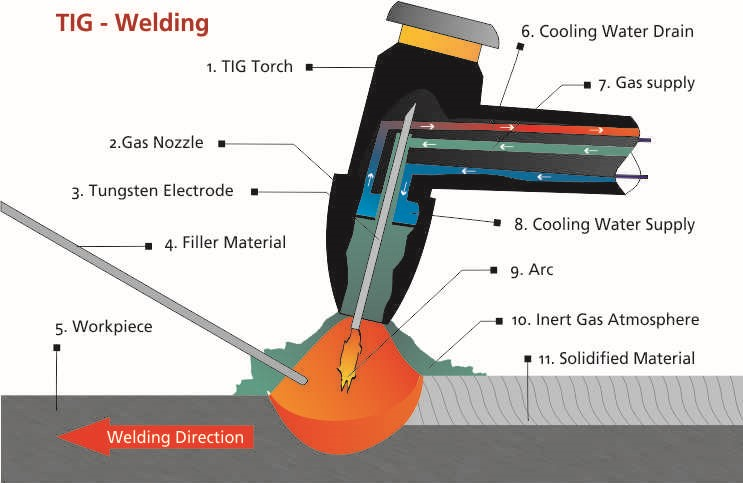

  *Fig. 1: Tungsten Inert Gas (TIG) Welding*
  
  Source: Rime, Tollenaar Industries

In [ ]:
#Install kaggle python package for importing dataset
!pip install kaggle

In [ ]:
!kaggle datasets download -d danielbacioiu/tig-aluminium-5083

Dataset URL: https://www.kaggle.com/datasets/danielbacioiu/tig-aluminium-5083
License(s): CC-BY-SA-4.0
100% 11.2G/11.2G [02:29<00:00, 90.9MB/s]
100% 11.2G/11.2G [02:29<00:00, 80.6MB/s]


In [2]:
!unzip tig-aluminium-5083.zip

Streaming output truncated to the last 5000 lines.
  inflating: al5083/train/170906-151353-Al 2mm/frame_01055.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01056.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01057.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01058.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01059.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01060.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01061.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01062.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01063.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01064.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01065.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01066.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01067.png  
  inflating: al5083/train/170906-151353-Al 2mm/frame_01068.png  
  inflating: al5083/train/170906-151353

In [4]:
import json

# Define the path to the JSON file
json_file_path = '/content/al5083/al5083/train/train.json'

# Open the JSON file and load its contents
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Print the JSON data
print(json.dumps(data, indent=4))  # Pretty print with indentation

{
    "170906-113317-Al 2mm-part3/frame_00647.png": 1,
    "170906-113317-Al 2mm-part3/frame_00672.png": 1,
    "170906-113317-Al 2mm-part3/frame_00677.png": 1,
    "170906-113317-Al 2mm-part3/frame_00646.png": 1,
    "170906-113317-Al 2mm-part3/frame_00691.png": 1,
    "170906-113317-Al 2mm-part3/frame_00684.png": 1,
    "170906-113317-Al 2mm-part3/frame_00665.png": 1,
    "170906-113317-Al 2mm-part3/frame_00668.png": 1,
    "170906-113317-Al 2mm-part3/frame_00651.png": 1,
    "170906-113317-Al 2mm-part3/frame_00655.png": 1,
    "170906-113317-Al 2mm-part3/frame_00657.png": 1,
    "170906-113317-Al 2mm-part3/frame_00687.png": 1,
    "170906-113317-Al 2mm-part3/frame_00654.png": 1,
    "170906-113317-Al 2mm-part3/frame_00676.png": 1,
    "170906-113317-Al 2mm-part3/frame_00688.png": 1,
    "170906-113317-Al 2mm-part3/frame_00674.png": 1,
    "170906-113317-Al 2mm-part3/frame_00649.png": 1,
    "170906-113317-Al 2mm-part3/frame_00693.png": 1,
    "170906-113317-Al 2mm-part3/frame_00643.

In [ ]:
# Check the type of 'data'
print(type(data))

<class 'dict'>


In [ ]:
# Initialize a set to store unique values
unique_values = set()

# Iterate over the dictionary and add unique values to the set
for key, value in data.items():
    unique_values.add(value)

# Count of unique values
unique_count = len(unique_values)

# Print the unique values and their count
print(f"Unique values: {unique_values}")
print(f"Count of unique values: {unique_count}")

Unique values: {0, 1, 2, 3, 4, 5}
Count of unique values: 6


In [ ]:
import os
import shutil

# Define the source and destination directories
source_dir = '/content/al5083/train'
destination_dir = '/content/al5083/train_reorganized'

# Define the target subdirectories for the two groups
normal_dir = os.path.join(destination_dir, 'Normal')
defective_dir = os.path.join(destination_dir, 'Defective')

# Create the destination directories if they don't exist
os.makedirs(normal_dir, exist_ok=True)
os.makedirs(defective_dir, exist_ok=True)

# Iterate over the class folders in the source directory
for class_folder in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_folder)

    # Check if it is a directory
    if os.path.isdir(class_path):
        # Determine the group based on class number
        if class_folder == '0':
            # Move images to the Normal folder
            target_dir = normal_dir
        elif class_folder in ['1', '2', '3', '4', '5']:
            # Move images to the Defective folder
            target_dir = defective_dir
        else:
            # Skip any unexpected directories
            continue

        # Move each image from the current class folder to the target directory
        for image_file in os.listdir(class_path):
            image_source_path = os.path.join(class_path, image_file)
            image_destination_path = os.path.join(target_dir, image_file)

            # Move the image
            shutil.move(image_source_path, image_destination_path)

        print(f"Moved images from class {class_folder} to {'Normal' if target_dir == normal_dir else 'Defective'}")


**NUMBER OF IMAGES FROM "/content/al5083/al5083"**

In [5]:
# Number of Images in 'Train' folder
import os

# Set the directory path
directory_path = '/content/al5083/al5083/train'

# Get the list of all items in the directory
items = os.listdir(directory_path)

# Filter out only the directories
folders = [item for item in items if os.path.isdir(os.path.join(directory_path, item))]

# Define a set of valid image extensions
image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'}

# Initialize total image count
total_image_count = 0

# Print the folders and count of images in each
for folder in folders:
    folder_path = os.path.join(directory_path, folder)
    # List all files in the folder
    files = os.listdir(folder_path)
    # Count the number of image files
    image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in image_extensions)

    # Accumulate the image count
    total_image_count += image_count

    # Print the folder path and the count of images
    print(f"Folder: {folder_path}, Image Count: {image_count}")

# Print the total image count
print(f"Total Image Count: {total_image_count}")

Folder: /content/al5083/al5083/train/170904-145718-Al 2mm-part2, Image Count: 78
Folder: /content/al5083/al5083/train/170913-151508-Al 2mm-part1, Image Count: 371
Folder: /content/al5083/al5083/train/170906-120346-Al 2mm, Image Count: 1165
Folder: /content/al5083/al5083/train/170904-115959-Al 2mm, Image Count: 870
Folder: /content/al5083/al5083/train/170904-152301-Al 2mm-part1, Image Count: 239
Folder: /content/al5083/al5083/train/170904-113012-Al 2mm-part1, Image Count: 230
Folder: /content/al5083/al5083/train/170904-141232-Al 2mm-part3, Image Count: 114
Folder: /content/al5083/al5083/train/170904-145718-Al 2mm-part1, Image Count: 619
Folder: /content/al5083/al5083/train/170815-134756-Al 2mm, Image Count: 786
Folder: /content/al5083/al5083/train/170904-154202-Al 2mm-part2, Image Count: 451
Folder: /content/al5083/al5083/train/170904-141232-Al 2mm-part1, Image Count: 869
Folder: /content/al5083/al5083/train/170913-155806-Al 2mm-part1, Image Count: 932
Folder: /content/al5083/al5083/tra

In [ ]:
import os

# Set the directory path
directory_path = '/content/al5083/al5083/test'

# Get the list of all items in the directory
items = os.listdir(directory_path)

# Filter out only the directories
folders = [item for item in items if os.path.isdir(os.path.join(directory_path, item))]

# Define a set of valid image extensions
image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'}

# Initialize total image count
total_image_count = 0

# Print the folders and count of images in each
for folder in folders:
    folder_path = os.path.join(directory_path, folder)
    # List all files in the folder
    files = os.listdir(folder_path)
    # Count the number of image files
    image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in image_extensions)

    # Accumulate the image count
    total_image_count += image_count

    # Print the folder path and the count of images
    print(f"Folder: {folder_path}, Image Count: {image_count}")

# Print the total image count
print(f"Total Image Count: {total_image_count}")

Folder: /content/al5083/al5083/test/170913-154448-Al 2mm, Image Count: 427
Folder: /content/al5083/al5083/test/170906-155007-Al 2mm-part2, Image Count: 399
Folder: /content/al5083/al5083/test/170906-155007-Al 2mm-part1, Image Count: 451
Folder: /content/al5083/al5083/test/170906-153326-Al 2mm-part3, Image Count: 154
Folder: /content/al5083/al5083/test/170906-104925-Al 2mm, Image Count: 651
Folder: /content/al5083/al5083/test/170904-150144-Al 2mm-part2, Image Count: 330
Folder: /content/al5083/al5083/test/170904-155610-Al 2mm, Image Count: 235
Folder: /content/al5083/al5083/test/170904-152301-Al 2mm-part2, Image Count: 234
Folder: /content/al5083/al5083/test/170906-113317-Al 2mm-part1, Image Count: 526
Folder: /content/al5083/al5083/test/170906-143512-Al 2mm-part2, Image Count: 351
Folder: /content/al5083/al5083/test/170906-143512-Al 2mm-part1, Image Count: 1212
Folder: /content/al5083/al5083/test/170904-154202-Al 2mm-part1, Image Count: 631
Folder: /content/al5083/al5083/test/170905-11

Print the names of the folders along with their corresponding image classes as specified in the 'json' file for both the 'Test' and 'Train' directories.

In [ ]:
import json

# Define the path to the JSON file
json_file_path = '/content/al5083/test/test.json'

# Open the JSON file and load its contents
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Print the dictionary in a pretty format
print(json.dumps(data, indent=4))

{
    "170906-143512-Al 2mm-part2/frame_01945.png": 1,
    "170906-143512-Al 2mm-part2/frame_01888.png": 1,
    "170906-143512-Al 2mm-part2/frame_01759.png": 1,
    "170906-143512-Al 2mm-part2/frame_01947.png": 1,
    "170906-143512-Al 2mm-part2/frame_01749.png": 1,
    "170906-143512-Al 2mm-part2/frame_01877.png": 1,
    "170906-143512-Al 2mm-part2/frame_01773.png": 1,
    "170906-143512-Al 2mm-part2/frame_01664.png": 1,
    "170906-143512-Al 2mm-part2/frame_01731.png": 1,
    "170906-143512-Al 2mm-part2/frame_01695.png": 1,
    "170906-143512-Al 2mm-part2/frame_01743.png": 1,
    "170906-143512-Al 2mm-part2/frame_01962.png": 1,
    "170906-143512-Al 2mm-part2/frame_01654.png": 1,
    "170906-143512-Al 2mm-part2/frame_01957.png": 1,
    "170906-143512-Al 2mm-part2/frame_01775.png": 1,
    "170906-143512-Al 2mm-part2/frame_01682.png": 1,
    "170906-143512-Al 2mm-part2/frame_01901.png": 1,
    "170906-143512-Al 2mm-part2/frame_01761.png": 1,
    "170906-143512-Al 2mm-part2/frame_01878.

**Listing Folders in the 'Train' and 'Test' Directories**                                                                                              

Print out the lists all directories within the specified 'Train' directory by filtering out non-directory items. It then prints the names of these directories.             

In [6]:
# Directory paths
test_directory_path = '/content/al5083/test'
train_directory_path = '/content/al5083/train'

In [7]:
# Function to print out the folders in each of 'Train' and 'Test' directory by defining the path to the folder
def print_folders_in_directory(directory_path):
    items = os.listdir(directory_path)
    folders = [item for item in items if os.path.isdir(os.path.join(directory_path, item))]
    print(f"Folders inside '{directory_path}':")
    for folder in folders:
        print(folder)
    return folders

In [ ]:
# Print folders in 'Test' directory
folders_test = print_folders_in_directory(test_directory_path)
print()
print()
# Print folders in 'Train' directory
folders_train = print_folders_in_directory(train_directory_path)

Folders inside '/content/al5083/test':
170906-143512-Al 2mm-part1
170904-150144-Al 2mm-part2
170906-104925-Al 2mm
170906-113317-Al 2mm-part1
170906-155007-Al 2mm-part1
170906-143512-Al 2mm-part2
170906-153326-Al 2mm-part3
170905-112213-Al 2mm
170906-155007-Al 2mm-part2
170913-154448-Al 2mm
170906-151724-Al 2mm-part1
170904-154202-Al 2mm-part1
170904-155610-Al 2mm
170904-152301-Al 2mm-part2


Folders inside '/content/al5083/train':
170906-120346-Al 2mm
170904-115503-Al 2mm
170906-153326-Al 2mm-part2
170906-144958-Al 2mm
170905-110711-Al 2mm-part1
170904-141232-Al 2mm-part1
170913-151508-Al 2mm-part2
170904-145718-Al 2mm-part2
170905-114307-Al 2mm
170913-151508-Al 2mm-part1
170815-134756-Al 2mm
170906-151353-Al 2mm
170906-114912-Al 2mm
170815-133921-Al 2mm
170913-152931-Al 2mm-part1
170906-150801-Al 2mm
170913-143933-Al 2mm-part1
170906-150010-Al 2mm
170904-113012-Al 2mm-part1
170905-115602-Al 2mm
170906-141809-Al 2mm-part1
170906-141809-Al 2mm-part2
170906-153326-Al 2mm-part1
170904-115

In [12]:
# Define the path to the directory of 'Test' folder
directory_path = '/content/al5083/test'

# List all items in the directory
items = os.listdir(directory_path)

# Filter out only the directories
folders_test = [item for item in items if os.path.isdir(os.path.join(directory_path, item))]

# Print the folder names
print("Folders inside '{}':".format(directory_path))
for folder in folders_test:
    print(folder)

Folders inside '/content/al5083/test':
170906-151724-Al 2mm-part1
170906-153326-Al 2mm-part3
170906-113317-Al 2mm-part1
170906-155007-Al 2mm-part1
170906-104925-Al 2mm
170906-143512-Al 2mm-part2
170906-143512-Al 2mm-part1
170905-112213-Al 2mm
170906-155007-Al 2mm-part2
170904-155610-Al 2mm
170904-152301-Al 2mm-part2
170904-150144-Al 2mm-part2
170904-154202-Al 2mm-part1
170913-154448-Al 2mm


**Class Verification by Sub-Folder**


Given that the **'Train' and 'Test'** folders contain sub-folders with images of aluminium TIG welding, where each sub-folder corresponds to one of six distinct image classes, the code prints out the class of images for each sub-folder by:

 **Class Representation:**

  0 - Good Weld

  1 - Burn Through

  2 - Contamination

  3 - Lack of Fusion

  4 - Misalignment

  5 - Lack of Penetration

The code prints out the class of images for each sub-folder by examining the JSON file. It prints just one image per sub-folder to determine the class that the images in that sub-folder belong to. This approach helps to quickly verify the classification of images within each sub-folder.

In [17]:
# Define the path to the JSON file and load its contents
def load_json_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

In [18]:
# Load 'Train' folder JSON data
train_json_file_path = '/content/al5083/train/train.json'
train_data = load_json_data(train_json_file_path)

# Load 'Test' folder JSON data
test_json_file_path = '/content/al5083/test/test.json'
test_data = load_json_data(test_json_file_path)

In [19]:
def print_image_class_per_folder(data, folders):
    for folder in folders:
        found = False
        for key, value in data.items():
            if key.startswith(folder):
                print(f"Folder: {folder}, Image Class: {value}")
                found = True
                break
        if not found:
            print(f"No class found for folder: {folder}")

In [13]:
# Print image class for each folder in 'Test' folder
print_image_class_per_folder(test_data, folders_test)

Folder: 170906-151724-Al 2mm-part1, Image Class: 3
Folder: 170906-153326-Al 2mm-part3, Image Class: 3
Folder: 170906-113317-Al 2mm-part1, Image Class: 0
Folder: 170906-155007-Al 2mm-part1, Image Class: 3
Folder: 170906-104925-Al 2mm, Image Class: 0
Folder: 170906-143512-Al 2mm-part2, Image Class: 1
Folder: 170906-143512-Al 2mm-part1, Image Class: 2
Folder: 170905-112213-Al 2mm, Image Class: 0
Folder: 170906-155007-Al 2mm-part2, Image Class: 4
Folder: 170904-155610-Al 2mm, Image Class: 2
Folder: 170904-152301-Al 2mm-part2, Image Class: 5
Folder: 170904-150144-Al 2mm-part2, Image Class: 4
Folder: 170904-154202-Al 2mm-part1, Image Class: 2
Folder: 170913-154448-Al 2mm, Image Class: 0


**Dictionary for Sub-folders in 'Train' and 'Test' Folder**


The dictionaries below map the sub-folder names to their respective image classes for both the 'Train' and 'Test' datasets.

In [20]:
import os
import shutil

# Define paths
train_folder = '/content/al5083/train'
test_folder = '/content/al5083/test'
destination_folder = '/content/Conspicuity_Detection'

# Define folders with image class 0
folders_with_class_0 = {
    'Train': [
        '170906-120346-Al 2mm', '170905-114307-Al 2mm', '170913-151508-Al 2mm-part1',
        '170906-114912-Al 2mm', '170904-145718-Al 2mm-part1', '170905-115602-Al 2mm',
        '170906-141809-Al 2mm-part1', '170913-155806-Al 2mm-part1', '170904-141730-Al 2mm-part1',
        '170913-142501-Al 2mm'
    ],
    'Test': [
        '170906-104925-Al 2mm', '170906-113317-Al 2mm-part1', '170905-112213-Al 2mm',
        '170913-154448-Al 2mm'
    ]
}

# Create destination folders
os.makedirs(os.path.join(destination_folder, 'Normal'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'Defective'), exist_ok=True)

# Function to copy images based on folder names
def copy_images(source_folder, folder_list, label):
    for folder in folder_list:
        folder_path = os.path.join(source_folder, folder)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # adjust extensions if necessary
                    source_file_path = os.path.join(folder_path, filename)
                    destination_file_path = os.path.join(destination_folder, label, filename)
                    shutil.copy2(source_file_path, destination_file_path)
                    print(f"Copied {source_file_path} to {destination_file_path}")

# Copy images for Train folder
print("Processing Train data...")
copy_images(train_folder, folders_with_class_0['Train'], 'Normal')

# Copy images for Test folder
print("Processing Test data...")
copy_images(test_folder, folders_with_class_0['Test'], 'Normal')

Streaming output truncated to the last 5000 lines.
Copied /content/al5083/train/170906-141809-Al 2mm-part1/frame_00986.png to /content/Conspicuity_Detection/Normal/frame_00986.png
Copied /content/al5083/train/170906-141809-Al 2mm-part1/frame_01237.png to /content/Conspicuity_Detection/Normal/frame_01237.png
Copied /content/al5083/train/170906-141809-Al 2mm-part1/frame_00639.png to /content/Conspicuity_Detection/Normal/frame_00639.png
Copied /content/al5083/train/170906-141809-Al 2mm-part1/frame_00748.png to /content/Conspicuity_Detection/Normal/frame_00748.png
Copied /content/al5083/train/170906-141809-Al 2mm-part1/frame_00441.png to /content/Conspicuity_Detection/Normal/frame_00441.png
Copied /content/al5083/train/170906-141809-Al 2mm-part1/frame_00944.png to /content/Conspicuity_Detection/Normal/frame_00944.png
Copied /content/al5083/train/170906-141809-Al 2mm-part1/frame_00874.png to /content/Conspicuity_Detection/Normal/frame_00874.png
Copied /content/al5083/train/170906-141809-Al 

In [21]:
# Copy remaining images to Defective
def copy_remaining_images(source_folder, label):
    for folder_name in os.listdir(source_folder):
        folder_path = os.path.join(source_folder, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # adjust extensions if necessary
                    source_file_path = os.path.join(folder_path, filename)
                    destination_file_path = os.path.join(destination_folder, label, filename)
                    shutil.copy2(source_file_path, destination_file_path)
                    print(f"Copied {source_file_path} to {destination_file_path}")

# Copy remaining images in Train and Test folders to Defective
print("Processing remaining Train data...")
copy_remaining_images(train_folder, 'Defective')

print("Processing remaining Test data...")
copy_remaining_images(test_folder, 'Defective')

Streaming output truncated to the last 5000 lines.
Copied /content/al5083/test/170906-104925-Al 2mm/frame_00531.png to /content/Conspicuity_Detection/Defective/frame_00531.png
Copied /content/al5083/test/170906-104925-Al 2mm/frame_00795.png to /content/Conspicuity_Detection/Defective/frame_00795.png
Copied /content/al5083/test/170906-104925-Al 2mm/frame_00263.png to /content/Conspicuity_Detection/Defective/frame_00263.png
Copied /content/al5083/test/170906-104925-Al 2mm/frame_00706.png to /content/Conspicuity_Detection/Defective/frame_00706.png
Copied /content/al5083/test/170906-104925-Al 2mm/frame_00472.png to /content/Conspicuity_Detection/Defective/frame_00472.png
Copied /content/al5083/test/170906-104925-Al 2mm/frame_00202.png to /content/Conspicuity_Detection/Defective/frame_00202.png
Copied /content/al5083/test/170906-104925-Al 2mm/frame_00556.png to /content/Conspicuity_Detection/Defective/frame_00556.png
Copied /content/al5083/test/170906-104925-Al 2mm/frame_00804.png to /conte

**Classifying Images into 'Normal' and 'Defective' Categories**

The below processes both the 'Train' and 'Test' folders by reading the respective JSON files to determine the class of each image. It then organizes images into 'Normal' and 'Defective' categories based on their class values, copying them to the appropriate destination folders. The code ensures the necessary destination folders are created before copying the images.

In [22]:
#Determine the number of images in each class ('Normal' vs. 'Defective')

# Define the paths to the 'Normal' and 'Defective' folders
normal_folder = '/content/Conspicuity_Detection/Defective'
defective_folder = '/content/Conspicuity_Detection/Normal'

# Function to count images in a given folder
def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Count and print the number of images in each folder
normal_count = count_images(normal_folder)
defective_count = count_images(defective_folder)

print(f"Number of images in 'Normal' folder: {normal_count}")
print(f"Number of images in 'Defective' folder: {defective_count}")

Number of images in 'Normal' folder: 2511
Number of images in 'Defective' folder: 1248


In [23]:
# Define the paths to the 'Normal' and 'Defective' folders
normal_folder = '/content/Conspicuity_Detection/Normal'
defective_folder = '/content/Conspicuity_Detection/Defective'

# Function to count images in a folder
def count_images(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    # Count files (assuming all files are images)
    return len(files)

# Count images in 'Normal' and 'Defective' folders
normal_count = count_images(normal_folder)
defective_count = count_images(defective_folder)

print(f"Number of images in 'Normal' folder: {normal_count}")
print(f"Number of images in 'Defective' folder: {defective_count}")


Number of images in 'Normal' folder: 1248
Number of images in 'Defective' folder: 2511


**QAUNTUM MACHINE LEARNING**

In [24]:
#Installing PennyLane
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.0 MB/s eta 0:00:00


In [25]:
#Import necessary libriries
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

As shown in the result above, there are more images in the 'Defective' folder than in the 'Normal' folder. To address this class imbalance, we will use data augmentation to artificially increase the number of normal images. The techniques to be applied include:

- **Rotations**: Apply various degrees of rotation to the images.
- **Flips**: Perform horizontal and/or vertical flips.
- **Scaling**: Resize the images while maintaining their aspect ratio.
- **Cropping**: Randomly crop portions of the images.
- **Color Adjustments**: Modify image properties such as brightness, contrast, and saturation.

These techniques will help in creating a more balanced dataset and improve the model's performance.

In [26]:
# Data augmentation for normal images
datagen_normal = ImageDataGenerator(
    rotation_range=30,        # Random rotations up to 30 degrees
    width_shift_range=0.2,    # Random horizontal shifts
    height_shift_range=0.2,   # Random vertical shifts
    shear_range=0.2,          # Random shearing
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flips
    fill_mode='nearest',      # Fill missing pixels after transformations
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    rescale=1./255            # Normalize pixel values
)


In [27]:
def augment_normal_images(normal_path, save_path, target_count):
    # Create the save directory if it does not exist
    os.makedirs(save_path, exist_ok=True)

    # Load images from the directory
    filenames = os.listdir(normal_path)
    images = [plt.imread(os.path.join(normal_path, filename)) for filename in filenames]

    # Convert list to a numpy array
    images_array = np.array(images)

    # Check if images are grayscale or RGB
    if images_array.ndim == 3:  # For grayscale images
        images_array = np.expand_dims(images_array, axis=-1)  # Add channel dimension

    # Add batch dimension to the array
    images_array = np.expand_dims(images_array, axis=0)

    # Initialize the data generator
    datagen_normal = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        brightness_range=[0.8, 1.2],
        rescale=1./255
    )
    datagen_normal.fit(images_array[0])  # Fit on the batch of images

    # Apply augmentation
    for i, _ in enumerate(datagen_normal.flow(images_array[0], batch_size=1, save_to_dir=save_path, save_prefix='aug', save_format='jpeg')):
        if i >= target_count:
            break  # Stop after generating the target number of images

# Define paths and target count
normal_path = "/content/Conspicuity_Detection/Normal"
save_path = "/content/Conspicuity_Detection/Augmented_Normal"
target_count = 2511  # Target count to balance with defective images

# Augment normal images
augment_normal_images(normal_path, save_path, target_count)

# Verify the number of images
num_augmented_images = len(os.listdir(save_path))
print(f"Number of augmented normal images: {num_augmented_images}")

Number of augmented normal images: 2512


**Splitting the Dataset:**

 70% split for training, 20% for validation, and 10% for **testing**

In [29]:
from sklearn.model_selection import train_test_split

# Paths
Defect_PATH = "/content/Conspicuity_Detection/Defective"
Normal_PATH = "/content/Conspicuity_Detection/Augmented_Normal"

# Function to get the list of image files
def get_image_files(folder_path):
    return [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Get all image files
defect_images = get_image_files(Defect_PATH)
normal_images = get_image_files(Normal_PATH)

# Combine and shuffle the dataset
all_images = defect_images + normal_images
np.random.seed(0)
np.random.shuffle(all_images)

# Calculate split sizes
n_total = len(all_images)
n_train = int(0.70 * n_total)
n_val = int(0.20 * n_total)
n_test = n_total - n_train - n_val

# Split the dataset
train_images, temp_images = train_test_split(all_images, train_size=n_train, random_state=0)
val_images, test_images = train_test_split(temp_images, test_size=n_test, random_state=0)

# Print number of images in each split
print(f"Number of images for training: {len(train_images)}")
print(f"Number of images for validation: {len(val_images)}")
print(f"Number of images for testing: {len(test_images)}")

Number of images for training: 3516
Number of images for validation: 1004
Number of images for testing: 503


**Subdirectories for Training, Validation and Testing**

Creating subdirectories for training, validation, and testing, and copy the respective images into these directories

In [30]:
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
Defect_PATH = "/content/Conspicuity_Detection/Defective"
Normal_PATH = "/content/Conspicuity_Detection/Augmented_Normal"
base_dir = "/content/Conspicuity_Detection"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Create directories for training, validation, and testing
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create subdirectories for each class
def create_class_dirs(base_path):
    os.makedirs(os.path.join(base_path, 'Defective'), exist_ok=True)
    os.makedirs(os.path.join(base_path, 'Normal'), exist_ok=True)

create_class_dirs(train_dir)
create_class_dirs(val_dir)
create_class_dirs(test_dir)

# Function to get the list of image files
def get_image_files(folder_path):
    return [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Function to copy images to the appropriate directories
def copy_images(image_list, target_dir):
    for image_path in image_list:
        class_name = 'Defective' if 'Defective' in image_path else 'Normal'
        shutil.copy(image_path, os.path.join(target_dir, class_name, os.path.basename(image_path)))

# Get all image files
defect_images = get_image_files(Defect_PATH)
normal_images = get_image_files(Normal_PATH)

# Combine and shuffle the dataset
all_images = defect_images + normal_images
np.random.seed(0)
np.random.shuffle(all_images)

# Calculate split sizes
n_total = len(all_images)
n_train = int(0.70 * n_total)
n_val = int(0.20 * n_total)
n_test = n_total - n_train - n_val

# Split the dataset
train_images, temp_images = train_test_split(all_images, train_size=n_train, random_state=0)
val_images, test_images = train_test_split(temp_images, test_size=n_test, random_state=0)

# Print number of images in each split
print(f"Number of images for training: {len(train_images)}")
print(f"Number of images for validation: {len(val_images)}")
print(f"Number of images for testing: {len(test_images)}")

# Copy images to corresponding directories
copy_images(train_images, train_dir)
copy_images(val_images, val_dir)
copy_images(test_images, test_dir)

Number of images for training: 3516
Number of images for validation: 1004
Number of images for testing: 503


In [31]:
# Create ImageDataGenerator instances with appropriate preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    rotation_range=40,       # Example augmentation parameters
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255  # Only normalization for validation
)

test_datagen = ImageDataGenerator(
    rescale=1./255  # Only normalization for testing
)

# Load the images from the directories
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),   # Resize images to the desired size
    batch_size=32,            # Number of images to yield per batch
    class_mode='binary'       # Binary classification (Defective vs Normal)
)

val_gen = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),   # Resize images to the desired size
    batch_size=32,            # Number of images to yield per batch
    class_mode='binary'       # Binary classification (Defective vs Normal)
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),   # Resize images to the desired size
    batch_size=32,            # Number of images to yield per batch
    class_mode='binary'       # Binary classification (Defective vs Normal)
)

# Use the generators
for images, labels in train_gen:
    print('Train batch:', images.shape, labels.shape)
    break

for images, labels in val_gen:
    print('Validation batch:', images.shape, labels.shape)
    break

for images, labels in test_gen:
    print('Test batch:', images.shape, labels.shape)
    break

Found 3516 images belonging to 2 classes.
Found 1004 images belonging to 2 classes.
Found 503 images belonging to 2 classes.
Train batch: (32, 150, 150, 3) (32,)
Validation batch: (32, 150, 150, 3) (32,)
Test batch: (32, 150, 150, 3) (32,)


Collect images and labels from the 'Train', 'Validation' and 'Test' generators.

In [32]:
# Add extra dimension for convolution channels
def collect_data(generator):
    images_list = []
    labels_list = []

    # Iterate over the generator to collect a few batches
    for images, labels in generator:
        images_list.append(images)
        labels_list.append(labels)
        # Break after one batch to avoid loading too much data
        break

    # Convert the collected batches to numpy arrays
    images_array = np.vstack(images_list)
    labels_array = np.vstack(labels_list)
    return images_array, labels_array

# Collect training data
train_images, train_labels = collect_data(train_gen)
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)

# Collect validation data
val_images, val_labels = collect_data(val_gen)
print('Validation images shape:', val_images.shape)
print('Validation labels shape:', val_labels.shape)

# Collect test data
test_images, test_labels = collect_data(test_gen)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

Train images shape: (32, 150, 150, 3)
Train labels shape: (1, 32)
Validation images shape: (32, 150, 150, 3)
Validation labels shape: (1, 32)
Test images shape: (32, 150, 150, 3)
Test labels shape: (1, 32)


**Setting of the Main Hyper-parameters of the Model**

In [38]:
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers

PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

**Quantum Circuit as a Convolution Kernel**

In [39]:

dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

In [40]:
#The Convolution Scheme
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

**Quantum Pre-Processing of the Dataset**

In [41]:
# Define the paths for the new folders
Q_PrepTrain = '/content/Q_PrepTrain'
Q_PrepValid = '/content/Q_PrepValid'
Q_PrepTest = '/content/Q_PrepTest'

# Create the folders if they don't exist
os.makedirs(Q_PrepTrain, exist_ok=True)
os.makedirs(Q_PrepValid, exist_ok=True)
os.makedirs(Q_PrepTest, exist_ok=True)

# Set the SAVE_PATH to the appropriate folder
SAVE_PATH_TRAIN = Q_PrepTrain + "/"
SAVE_PATH_VALID = Q_PrepValid + "/"
SAVE_PATH_TEST = Q_PrepTest + "/"

In [42]:
if PREPROCESS:
    # Quantum pre-processing for training images
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print("{}/{}        ".format(idx + 1, len(train_images)), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    # Quantum pre-processing for validation images
    q_valid_images = []
    print("\nQuantum pre-processing of validation images:")
    for idx, img in enumerate(val_images):
        print("{}/{}        ".format(idx + 1, len(val_images)), end="\r")
        q_valid_images.append(quanv(img))
    q_valid_images = np.asarray(q_valid_images)

    # Quantum pre-processing for test images
    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print("{}/{}        ".format(idx + 1, len(test_images)), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH_TRAIN + "q_train_images.npy", q_train_images)
    np.save(SAVE_PATH_VALID + "q_valid_images.npy", q_valid_images)
    np.save(SAVE_PATH_TEST + "q_test_images.npy", q_test_images)

# Load pre-processed images
q_train_images = np.load(SAVE_PATH_TRAIN + "q_train_images.npy")
q_valid_images = np.load(SAVE_PATH_VALID + "q_valid_images.npy")
q_test_images = np.load(SAVE_PATH_TEST + "q_test_images.npy")

Quantum pre-processing of train images:

Quantum pre-processing of validation images:

Quantum pre-processing of test images:


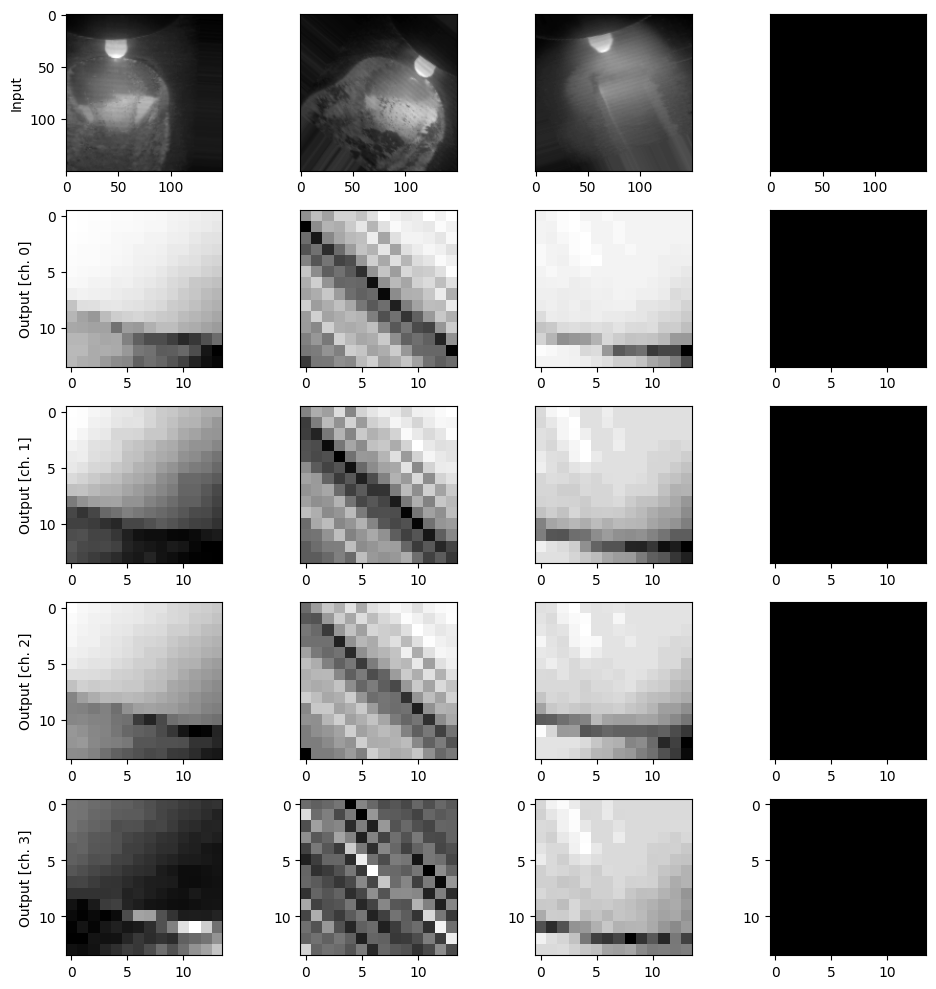

(32, 150, 150, 3)
(32, 14, 14, 4)


In [ ]:
#Visualizing the effect of the quantum convolution layer on a batch sample
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

print(train_images.shape)
print(q_train_images.shape)

**Hybrid Quantum-Classical Model**

### Explanation of `MyModel` Function

The `MyModel` function creates and returns a custom Keras model designed for classification tasks.


**Model Structure**: It uses a sequential model with several layers:
  - `Flatten()`: Converts the input image into a 1D vector.
  - `Dense(128, activation="relu")`: A dense layer with 128 units and ReLU activation, including L2 regularization to prevent overfitting.
  - `Dropout(0.5)`: Applies dropout to randomly ignore 50% of neurons during training to reduce overfitting.
  - `Dense(64, activation="relu")`: Another dense layer with 64 units and ReLU activation, with L2 regularization.
  - `Dropout(0.5)`: Applies dropout again for further regularization.
  - `Dense(10, activation="softmax")`: The output layer with 10 units (one for each class) and softmax activation to produce probability distributions over the classes.

**Compilation**: The model is compiled using the Adam optimizer and sparse categorical crossentropy loss function, with accuracy as the evaluation metric. This setup is suitable for training a neural network on classification tasks with multiple classes.

In [ ]:
# Import libraries
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = models.Sequential([
        layers.Flatten(),
        layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [ ]:
print(f'q_train_images shape: {q_train_images.shape}')
print(f'train_labels shape: {train_labels.shape}')

q_train_images shape: (32, 14, 14, 4)
train_labels shape: (1, 32)


In [ ]:
# Reshape the labels
train_labels = np.squeeze(train_labels)  # Remove single-dimensional entries
val_labels = np.squeeze(val_labels)      # Remove single-dimensional entries
test_labels = np.squeeze(test_labels)

# Print shapes of the reshaped label arrays
print(f'Reshaped train_labels shape: {train_labels.shape}')
print(f'Reshaped val_labels shape: {val_labels.shape}')
print(f'Reshaped test_labels shape: {test_labels.shape}')

Reshaped train_labels shape: (32,)
Reshaped val_labels shape: (32,)
Reshaped test_labels shape: (32,)


**Model Training**

In [ ]:
q_model = MyModel()

# Fit the model
q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_valid_images, val_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
8/8 - 1s - 180ms/step - accuracy: 0.5000 - loss: 1.0122 - val_accuracy: 0.7812 - val_loss: 0.6142
Epoch 2/30
8/8 - 0s - 10ms/step - accuracy: 0.8750 - loss: 0.5114 - val_accuracy: 0.9688 - val_loss: 0.5254
Epoch 3/30
8/8 - 0s - 17ms/step - accuracy: 0.9688 - loss: 0.4046 - val_accuracy: 0.8125 - val_loss: 0.4914
Epoch 4/30
8/8 - 0s - 16ms/step - accuracy: 0.9375 - loss: 0.3518 - val_accuracy: 0.8125 - val_loss: 0.4694
Epoch 5/30
8/8 - 0s - 18ms/step - accuracy: 0.9688 - loss: 0.3164 - val_accuracy: 0.8125 - val_loss: 0.4291
Epoch 6/30
8/8 - 0s - 17ms/step - accuracy: 0.9688 - loss: 0.2789 - val_accuracy: 0.8125 - val_loss: 0.4239
Epoch 7/30
8/8 - 0s - 15ms/step - accuracy: 0.9688 - loss: 0.2615 - val_accuracy: 0.8125 - val_loss: 0.3999
Epoch 8/30
8/8 - 0s - 10ms/step - accuracy: 0.9688 - loss: 0.2410 - val_accuracy: 0.8125 - val_loss: 0.3875
Epoch 9/30
8/8 - 0s - 10ms/step - accuracy: 0.9688 - loss: 0.2264 - val_accuracy: 0.8125 - val_loss: 0.3790
Epoch 10/30
8/8 - 0s - 9ms/

In [ ]:
print(f'Train images shape: {train_images.shape}')
print(f'Validation images shape: {q_valid_images.shape}')

Train images shape: (32, 150, 150, 3)
Validation images shape: (32, 14, 14, 4)


**Without Quantum Convolution Layer:**

(“Classical” instance of the Model)

In [ ]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
8/8 - 1s - 113ms/step - accuracy: 0.8438 - loss: 1.1860 - val_accuracy: 1.0000 - val_loss: 0.7873
Epoch 2/30
8/8 - 0s - 16ms/step - accuracy: 1.0000 - loss: 0.9280 - val_accuracy: 1.0000 - val_loss: 0.7832
Epoch 3/30
8/8 - 0s - 18ms/step - accuracy: 1.0000 - loss: 0.9230 - val_accuracy: 1.0000 - val_loss: 0.7789
Epoch 4/30
8/8 - 0s - 17ms/step - accuracy: 1.0000 - loss: 0.9179 - val_accuracy: 1.0000 - val_loss: 0.7747
Epoch 5/30
8/8 - 0s - 35ms/step - accuracy: 1.0000 - loss: 0.9129 - val_accuracy: 1.0000 - val_loss: 0.7704
Epoch 6/30
8/8 - 0s - 23ms/step - accuracy: 1.0000 - loss: 0.9078 - val_accuracy: 1.0000 - val_loss: 0.7661
Epoch 7/30
8/8 - 0s - 32ms/step - accuracy: 1.0000 - loss: 0.9027 - val_accuracy: 1.0000 - val_loss: 0.7618
Epoch 8/30
8/8 - 0s - 17ms/step - accuracy: 1.0000 - loss: 0.8977 - val_accuracy: 1.0000 - val_loss: 0.7575
Epoch 9/30
8/8 - 0s - 16ms/step - accuracy: 1.0000 - loss: 0.8926 - val_accuracy: 1.0000 - val_loss: 0.7532
Epoch 10/30
8/8 - 0s - 20ms

In [ ]:
def ClassicalModel():
    """Initializes and returns a custom Keras model which is ready to be trained."""
    model = keras.models.Sequential([
        # Convolutional layers to extract features
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),

        # Flatten layer to convert 2D data to 1D
        keras.layers.Flatten(),

        # Fully connected layer
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting

        # Output layer
        keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )
    return model


**Training the Model**

Update the training code to match the binary classification setup:

In [ ]:
c_model = ClassicalModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(val_images, val_labels),
    batch_size=32,  # Adjust batch size if needed
    epochs=10,
    verbose=2,
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 - 6s - 6s/step - accuracy: 0.0000e+00 - loss: 0.7346 - val_accuracy: 0.5938 - val_loss: 0.3026
Epoch 2/10
1/1 - 4s - 4s/step - accuracy: 0.5938 - loss: 0.3047 - val_accuracy: 0.5938 - val_loss: 0.2845
Epoch 3/10
1/1 - 4s - 4s/step - accuracy: 0.5938 - loss: 0.2848 - val_accuracy: 1.0000 - val_loss: 0.2773
Epoch 4/10
1/1 - 4s - 4s/step - accuracy: 1.0000 - loss: 0.2772 - val_accuracy: 1.0000 - val_loss: 0.2713
Epoch 5/10
1/1 - 2s - 2s/step - accuracy: 1.0000 - loss: 0.2714 - val_accuracy: 1.0000 - val_loss: 0.2608
Epoch 6/10
1/1 - 3s - 3s/step - accuracy: 1.0000 - loss: 0.2605 - val_accuracy: 1.0000 - val_loss: 0.2442
Epoch 7/10
1/1 - 3s - 3s/step - accuracy: 1.0000 - loss: 0.2432 - val_accuracy: 1.0000 - val_loss: 0.2206
Epoch 8/10
1/1 - 3s - 3s/step - accuracy: 1.0000 - loss: 0.2179 - val_accuracy: 1.0000 - val_loss: 0.1895
Epoch 9/10
1/1 - 4s - 4s/step - accuracy: 1.0000 - loss: 0.1870 - val_accuracy: 1.0000 - val_loss: 0.1517
Epoch 10/10
1/1 - 2s - 2s/step - accuracy:

**Results**

To visualize how well the models performs on the test set over the course of training, you can plot the test accuracy and test loss as functions of the number of training epochs.

<ipython-input-54-b1d5e388f551>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


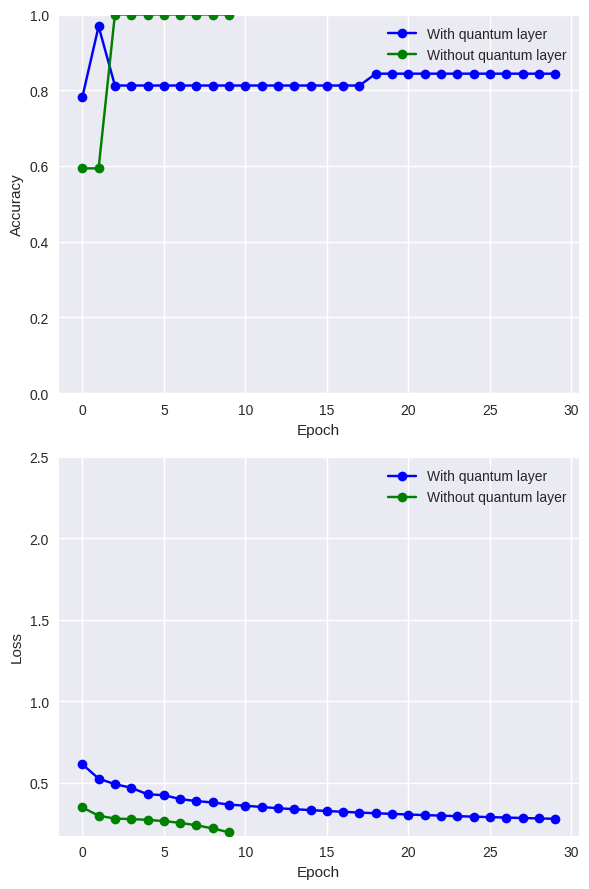

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show();